In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression 
warnings.simplefilter(action='ignore', category=FutureWarning)
# For handling missing data
from sklearn.impute import SimpleImputer


In [3]:
train_df=pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])
x_test=pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
test_df_sol=pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])

C:\Users\HP\AppData\Local\Temp\ipykernel_19248\1769787917.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_df=pd.read_csv("train_data.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


C:\Users\HP\AppData\Local\Temp\ipykernel_19248\1769787917.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  x_test=pd.read_csv("test_data.txt",sep=':::', names=['ID', 'TITLE', 'DESCRIPTION'])
C:\Users\HP\AppData\Local\Temp\ipykernel_19248\1769787917.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_df_sol=pd.read_csv("test_data_solution.txt",sep=':::', names=['ID', 'TITLE', 'GENRE', 'DESCRIPTION'])


In [4]:
train_df['ID']

0            1
1            2
2            3
3            4
4            5
         ...  
54209    54210
54210    54211
54211    54212
54212    54213
54213    54214
Name: ID, Length: 54214, dtype: int64

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54214 entries, 0 to 54213
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           54214 non-null  int64 
 1   TITLE        54214 non-null  object
 2   GENRE        54214 non-null  object
 3   DESCRIPTION  54214 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [6]:
train_df.isnull().sum()

ID             0
TITLE          0
GENRE          0
DESCRIPTION    0
dtype: int64

In [7]:
train_df['GENRE'].value_counts()

GENRE
drama           13613
documentary     13096
comedy           7447
short            5073
horror           2204
thriller         1591
action           1315
western          1032
reality-tv        884
family            784
adventure         775
music             731
romance           672
sci-fi            647
adult             590
crime             505
animation         498
sport             432
talk-show         391
fantasy           323
mystery           319
musical           277
biography         265
history           243
game-show         194
news              181
war               132
Name: count, dtype: int64

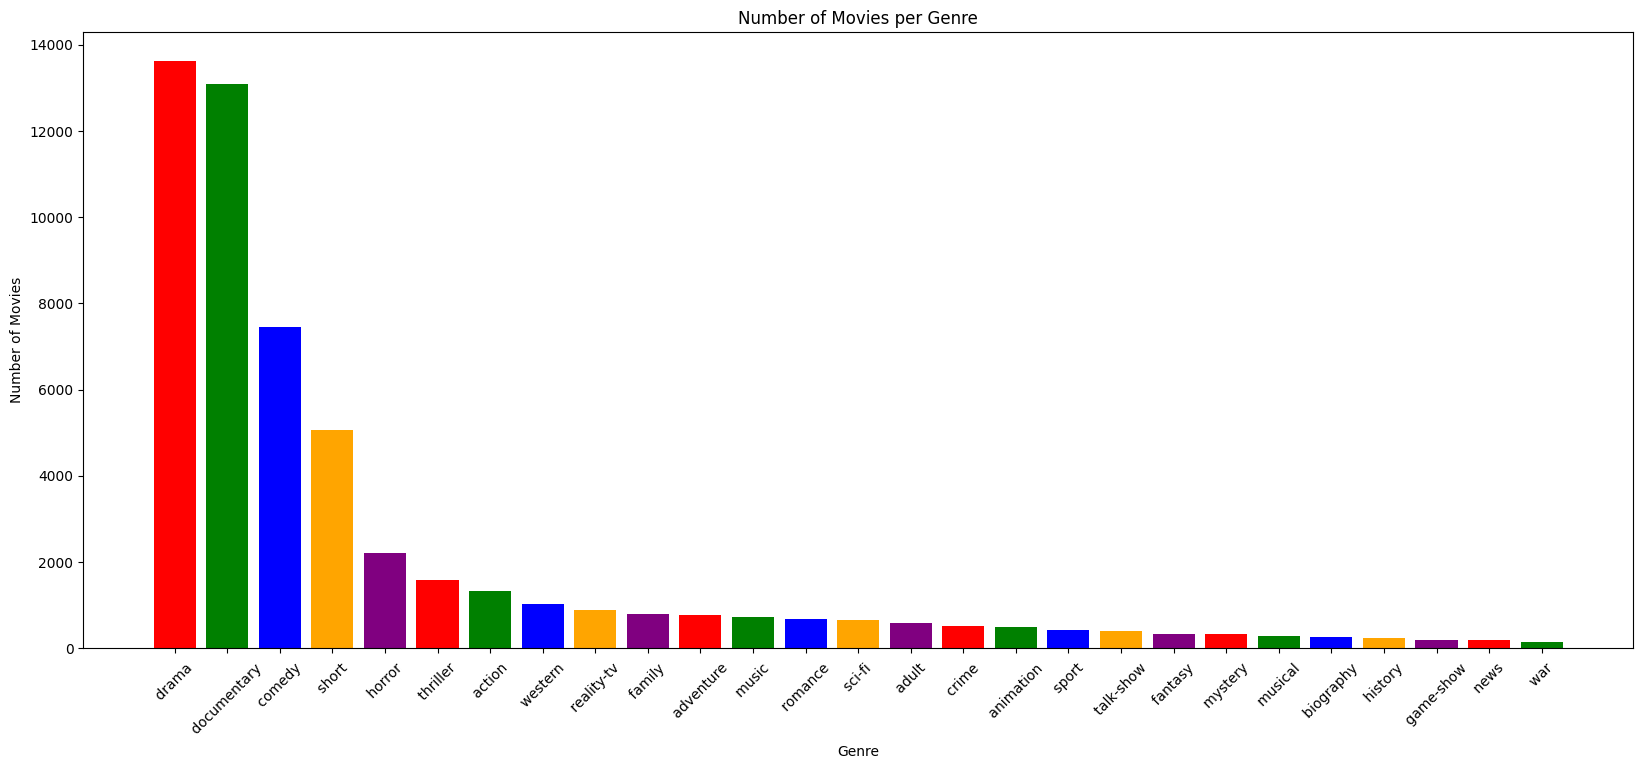

In [8]:
genre_counts =train_df['GENRE'].value_counts()

plt.figure(figsize=(20,8))

plt.bar(genre_counts.index, genre_counts.values,color=['red', 'green', 'blue', 'orange', 'purple'])
plt.title('Number of Movies per Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

In [9]:
train_df=train_df.drop(columns=['ID'],axis=1)
x_test=x_test.drop(columns=['ID'],axis=1)

In [10]:
le = LabelEncoder()
train_df['GENRE'] = le.fit_transform(train_df['GENRE'])
test_df_sol['GENRE'] = le.fit_transform(test_df_sol['GENRE'])

In [11]:
train_df['combined_text'] = train_df['TITLE'] + ' ' + train_df['DESCRIPTION']
x_test['combined_text'] = x_test['TITLE'] + ' ' + x_test['DESCRIPTION']

In [12]:
X_train=train_df.drop(['GENRE','DESCRIPTION','TITLE'],axis=1)

x_test=x_test.drop(['DESCRIPTION','TITLE'],axis=1)

In [13]:
X_train

,combined_text
0,Oscar et la dame rose (2009) Listening in t...
1,Cupid (1997) A brother and sister with a pa...
2,"Young, Wild and Wonderful (1980) As the bus..."
3,The Secret Sin (1915) To help their unemplo...
4,The Unrecovered (2007) The film's title ref...
...,...
54209,"""Bonino"" (1953) This short-lived NBC live s..."
54210,Dead Girls Don't Cry (????) The NEXT Genera...
54211,Ronald Goedemondt: Ze bestaan echt (2008) Z...
54212,Make Your Own Bed (1944) Walter and Vivian ...


In [14]:
x_test

,combined_text
0,Edgar's Lunch (1998) L.R. Brane loves his l...
1,"La guerra de papá (1977) Spain, March 1964:..."
2,Off the Beaten Track (2010) One year in the...
3,"Meu Amigo Hindu (2015) His father has died,..."
4,Er nu zhai (1955) Before he was known inter...
...,...
54195,"""Tales of Light & Dark"" (2013) Covering mul..."
54196,Der letzte Mohikaner (1965) As Alice and Co...
54197,Oliver Twink (2007) A movie 169 years in th...
54198,"Slipstream (1973) Popular, but mysterious r..."


In [15]:
y_train=train_df['GENRE']
y_test=test_df_sol['GENRE']
y_train

0         8
1        24
2         1
3         8
4         8
         ..
54209     5
54210    13
54211     7
54212     5
54213    12
Name: GENRE, Length: 54214, dtype: int64

In [16]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english')

# Fit the vectorizer on X_train
tfidf_vectorizer.fit(X_train['combined_text'])

X_train = tfidf_vectorizer.transform(X_train['combined_text'])
X_test = tfidf_vectorizer.transform(x_test['combined_text'])

In [17]:
x_train,x_val,y_train,y_val=train_test_split(X_train,y_train,test_size=0.1)

In [18]:
logreg=LogisticRegression(C=1)
logreg.fit(x_train,y_train)

c:\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=1)

In [19]:
y_train_pred1=logreg.predict(x_train)
print(classification_report(y_train,y_train_pred1))

              precision    recall  f1-score   support

           0       0.78      0.44      0.57      1176
           1       0.93      0.39      0.55       534
           2       0.87      0.24      0.38       689
           3       0.95      0.13      0.22       454
           4       0.00      0.00      0.00       246
           5       0.71      0.80      0.75      6657
           6       0.74      0.05      0.10       455
           7       0.73      0.95      0.83     11834
           8       0.66      0.91      0.76     12216
           9       0.84      0.16      0.26       690
          10       0.90      0.03      0.06       296
          11       0.96      0.51      0.67       173
          12       0.00      0.00      0.00       221
          13       0.83      0.76      0.79      1980
          14       0.87      0.55      0.67       654
          15       0.89      0.03      0.06       240
          16       1.00      0.02      0.04       293
          17       0.92    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [20]:
y_val_pred1=logreg.predict(x_val)
print(classification_report(y_val,y_val_pred1))

              precision    recall  f1-score   support

           0       0.53      0.20      0.29       139
           1       0.46      0.11      0.17        56
           2       0.55      0.07      0.12        86
           3       1.00      0.07      0.13        44
           4       0.00      0.00      0.00        19
           5       0.55      0.59      0.57       790
           6       0.00      0.00      0.00        50
           7       0.64      0.90      0.75      1262
           8       0.55      0.79      0.65      1397
           9       0.73      0.09      0.15        94
          10       0.00      0.00      0.00        27
          11       1.00      0.33      0.50        21
          12       0.00      0.00      0.00        22
          13       0.76      0.62      0.68       224
          14       0.73      0.39      0.51        77
          15       0.00      0.00      0.00        37
          16       0.00      0.00      0.00        26
          17       0.00    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [21]:
svc_model=LinearSVC(penalty='l2',C=0.1,dual=False)
svc_model.fit(x_train,y_train)

LinearSVC(C=0.1, dual=False)

In [22]:
y_train_pred2=svc_model.predict(x_train)
print(classification_report(y_train,y_train_pred2))

              precision    recall  f1-score   support

           0       0.89      0.52      0.65      1176
           1       0.95      0.60      0.73       534
           2       0.96      0.38      0.55       689
           3       0.98      0.38      0.55       454
           4       1.00      0.00      0.01       246
           5       0.76      0.78      0.77      6657
           6       1.00      0.15      0.26       455
           7       0.74      0.95      0.83     11834
           8       0.66      0.91      0.76     12216
           9       0.92      0.24      0.39       690
          10       0.96      0.24      0.38       296
          11       0.93      0.79      0.85       173
          12       1.00      0.01      0.02       221
          13       0.81      0.83      0.82      1980
          14       0.91      0.66      0.76       654
          15       0.97      0.14      0.25       240
          16       1.00      0.15      0.26       293
          17       0.94    

In [23]:
y_val_pred2=svc_model.predict(x_val)
print(classification_report(y_val,y_val_pred2))

              precision    recall  f1-score   support

           0       0.59      0.21      0.31       139
           1       0.60      0.16      0.25        56
           2       0.82      0.10      0.19        86
           3       0.75      0.07      0.12        44
           4       0.00      0.00      0.00        19
           5       0.57      0.55      0.56       790
           6       0.00      0.00      0.00        50
           7       0.63      0.92      0.74      1262
           8       0.55      0.81      0.65      1397
           9       0.75      0.03      0.06        94
          10       0.00      0.00      0.00        27
          11       0.92      0.52      0.67        21
          12       0.00      0.00      0.00        22
          13       0.72      0.66      0.69       224
          14       0.77      0.43      0.55        77
          15       0.00      0.00      0.00        37
          16       1.00      0.04      0.07        26
          17       1.00    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [24]:
y_test_pred2=svc_model.predict(X_test)
print(classification_report(y_test,y_test_pred2))

              precision    recall  f1-score   support

           0       0.54      0.23      0.32      1314
           1       0.65      0.26      0.37       590
           2       0.73      0.16      0.27       775
           3       0.62      0.03      0.06       498
           4       0.00      0.00      0.00       264
           5       0.56      0.55      0.56      7446
           6       1.00      0.01      0.02       505
           7       0.64      0.90      0.74     13096
           8       0.54      0.80      0.64     13612
           9       0.59      0.06      0.11       783
          10       0.64      0.02      0.04       322
          11       0.83      0.59      0.69       193
          12       0.00      0.00      0.00       243
          13       0.63      0.62      0.62      2204
          14       0.69      0.40      0.50       731
          15       0.67      0.01      0.01       276
          16       0.25      0.00      0.01       318
          17       0.85    

c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [25]:
def predict_genre(title, description, model, vectorizer, label_encoder):

    data = pd.DataFrame({'TITLE': [title], 'DESCRIPTION': [description]})

    data['combined_text'] = data['TITLE'] + ' ' + data['DESCRIPTION'] 

    X_new = vectorizer.transform(data['combined_text'])

    y_pred = model.predict(X_new)

    predicted_genre = label_encoder.inverse_transform(y_pred)[0]

    return predicted_genre

In [26]:
predict_genre("L'amica (1969)","The beautiful but neglected wife of a brilliant architect from Milan, betrayed by her husband and mocked by her friend who manages the amorous adventures that she dreams of having, decides to take vengeance of the two, seducing her friend's husband and her young son",svc_model,tfidf_vectorizer,le)

' drama '